# EDA Y ETL PARA BASE DE DATOS COMER LOGISTICS: 

## ARCHIVO A TRABAJAR : 2017PurchasePricesDec.csv

In [1]:
pip install pandas numpy matplotlib seaborn 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
! pip freeze > requirements.txt 

In [3]:
import pandas as pd 

##### CARGA Y LIMPIEZA DE DATOS - Limpiar datos, manejar valores nulos, transformar formatos y preparar los datos para análisis más profundos:

In [4]:
#carga archivo csv
df = pd.read_csv(r'C:\Users\danie\OneDrive\Escritorio\GitProyectoFinal\ComerLogistics\EDA y ETL Dani\2017PurchasePricesDec.csv')

In [5]:
print(df.head())

   Brand                  Description  Price   Size Volume  Classification  \
0     58  Gekkeikan Black & Gold Sake  12.99  750mL    750               1   
1     62     Herradura Silver Tequila  36.99  750mL    750               1   
2     63   Herradura Reposado Tequila  38.99  750mL    750               1   
3     72         No. 3 London Dry Gin  34.99  750mL    750               1   
4     75    Three Olives Tomato Vodka  14.99  750mL    750               1   

   PurchasePrice  VendorNumber                   VendorName  
0           9.28          8320  SHAW ROSS INT L IMP LTD      
1          28.67          1128  BROWN-FORMAN CORP            
2          30.46          1128  BROWN-FORMAN CORP            
3          26.11          9165  ULTRA BEVERAGE COMPANY LLP   
4          10.94          7245  PROXIMO SPIRITS INC.         


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           12261 non-null  int64  
 1   Description     12260 non-null  object 
 2   Price           12261 non-null  float64
 3   Size            12260 non-null  object 
 4   Volume          12260 non-null  object 
 5   Classification  12261 non-null  int64  
 6   PurchasePrice   12261 non-null  float64
 7   VendorNumber    12261 non-null  int64  
 8   VendorName      12261 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 862.2+ KB
None


In [7]:
print(df.describe()) # # Obtener estadísticas descriptivas de las variables numéricas

              Brand         Price  Classification  PurchasePrice  \
count  12261.000000  12261.000000    12261.000000   12261.000000   
mean   17989.067123     38.640240        1.708996      26.488220   
std    12528.503464    206.151172        0.454244     156.182948   
min       58.000000      0.000000        1.000000       0.000000   
25%     5990.000000     10.990000        1.000000       6.890000   
50%    18788.000000     15.990000        2.000000      10.650000   
75%    25117.000000     29.990000        2.000000      20.130000   
max    90631.000000  13999.900000        2.000000   11111.030000   

        VendorNumber  
count   12261.000000  
mean    10814.861757  
std     19007.682322  
min         2.000000  
25%      3960.000000  
50%      7153.000000  
75%      9552.000000  
max    173357.000000  


In [8]:
# Identificar la cantidad de valores nulos en cada columna
print("Valores nulos antes de la limpieza:\n", df.isnull().sum())

Valores nulos antes de la limpieza:
 Brand             0
Description       1
Price             0
Size              1
Volume            1
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64


### Limpieza de Datos (ETL). Manejo de valores nulos : 

In [9]:
# Limpiar valores nulos
df['Description'] = df['Description'].fillna('Unknown')
df['Size'] = df['Size'].fillna('Unknown')
df['Volume'] = df['Volume'].fillna('Unknown')

In [10]:
# Verificar que no queden valores nulos
print("Valores nulos después de la limpieza:\n", df.isnull().sum())

Valores nulos después de la limpieza:
 Brand             0
Description       0
Price             0
Size              0
Volume            0
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64


###  Análisis de Relaciones entre Variables y Visualización de Distribuciones

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

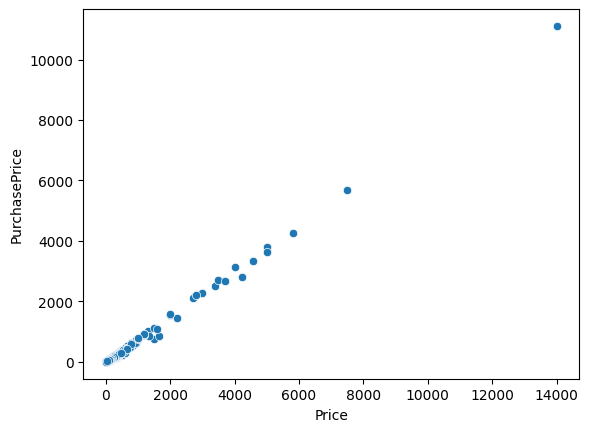

In [12]:
# Relación entre Price y PurchasePrice
sns.scatterplot(data=df, x='Price', y='PurchasePrice')
plt.show()

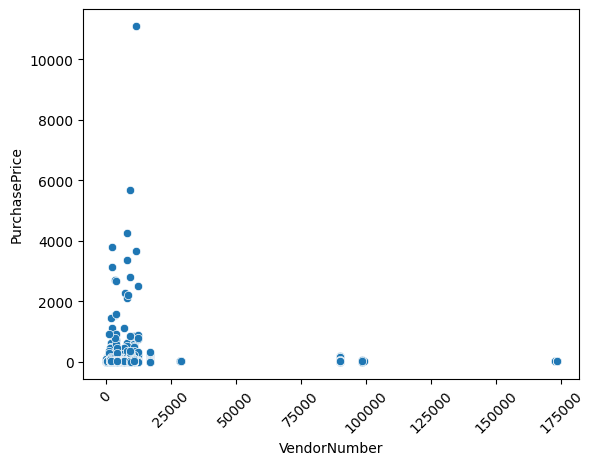

In [13]:
# Relación entre VendorNumber y PurchasePrice
sns.scatterplot(data=df, x='VendorNumber', y='PurchasePrice')
plt.xticks (rotation=45)
plt.show()

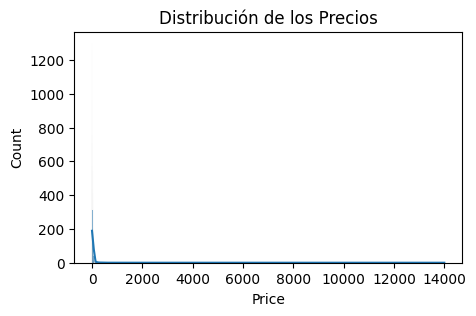

In [16]:
# Distribución de la columna 'Price'
plt.figure(figsize=(5, 3))
sns.histplot(df['Price'], kde=True)
plt.title('Distribución de los Precios')
plt.show()

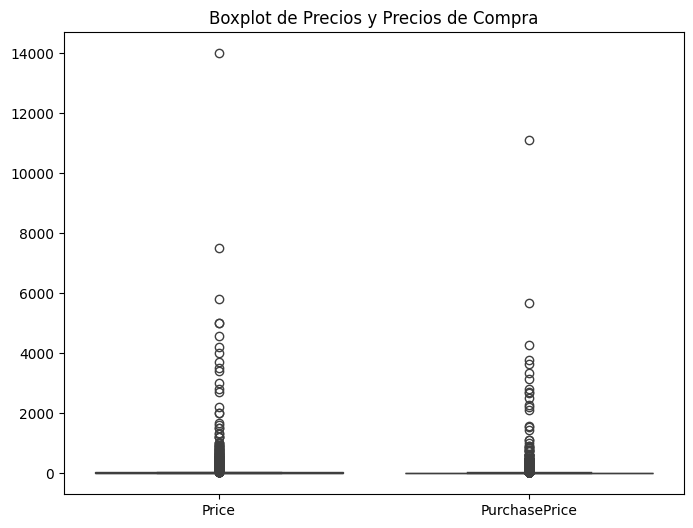

In [17]:
# Boxplot para analizar la dispersión de 'Price' y 'PurchasePrice'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['Price', 'PurchasePrice']])
plt.title('Boxplot de Precios y Precios de Compra')
plt.show()

### Transformaciones ETL

In [18]:
# Crear una nueva columna 'ProfitMargin' calculada como la diferencia entre Price y PurchasePrice
df['ProfitMargin'] = df['Price'] - df['PurchasePrice']

In [19]:
# Convertir la columna 'Size' en un número
df['SizeNumeric'] = df['Size'].str.extract(r'(\d+)').astype(float)

#### Guardar el dataset limpio

In [20]:
# Guardar el DataFrame transformado
df.to_csv('purchasePricesDec_new.csv', index=False)

In [21]:
#carga archivo csv
df1 = pd.read_csv(r'C:\Users\danie\OneDrive\Escritorio\GitProyectoFinal\ComerLogistics\EDA y ETL Dani\purchasePricesDec_new.csv')

In [22]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           12261 non-null  int64  
 1   Description     12261 non-null  object 
 2   Price           12261 non-null  float64
 3   Size            12261 non-null  object 
 4   Volume          12261 non-null  object 
 5   Classification  12261 non-null  int64  
 6   PurchasePrice   12261 non-null  float64
 7   VendorNumber    12261 non-null  int64  
 8   VendorName      12261 non-null  object 
 9   ProfitMargin    12261 non-null  float64
 10  SizeNumeric     12256 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 1.0+ MB
None


## ARCHIVO A TRABAJAR : 